In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%pylab inline

from datetime import datetime,timedelta
import json
import re

from collections import OrderedDict
from math import pi
import pytz
import time
import psycopg2
from sqlalchemy import create_engine

from scipy import stats
import csv

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('balanced_data.csv')

/Users/amiee/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.ix[0,:]

advertiser_app_store_id                                  1009442510
country_code                                                     CN
city                                                            NaN
campaign_id                                56fc3b248409c5677800005c
creative_id                                582efacc4156ab1024000034
device_language                                                  zh
device_make                                                   iPad3
device_model                                                      4
device_platform                                                 iOS
device_connection                                              wifi
device_os_version                                              10.2
device_screen_height                                           2048
device_screen_width                                            1536
device_volume                                                 0.375
event_id                                   58674

In [4]:
data.shape

(700000, 27)

In [5]:
for col in data.columns:
    print col, len(data[col].unique())

advertiser_app_store_id 841
country_code 219
city 7510
campaign_id 3927
creative_id 8835
device_language 143
device_make 2880
device_model 19976
device_platform 3
device_connection 3
device_os_version 167
device_screen_height 636
device_screen_width 636
device_volume 25736
event_id 667229
n_campaign_views 353
n_vungle_installs 27
publisher_app_store_id 10581
time_of_last_delivery_this_campaign 322105
time_of_last_delivery_this_creative 236890
time_of_last_delivery_any_installed_app 76948
time_of_last_vungle_delivery 395389
time_of_this_impression 295092
timestamp_at_install 206495
time_of_this_request 344952
time_zone 402
is_install 2


In [6]:
data_install = data[data['is_install'] == 1]
data_install

,advertiser_app_store_id,country_code,city,campaign_id,creative_id,device_language,device_make,device_model,device_platform,device_connection,...,publisher_app_store_id,time_of_last_delivery_this_campaign,time_of_last_delivery_this_creative,time_of_last_delivery_any_installed_app,time_of_last_vungle_delivery,time_of_this_impression,timestamp_at_install,time_of_this_request,time_zone,is_install
50000,57a0c2d7b019f8257c00018e,US,NaN,58580e0349704450630005c0,585be882a41b0d391e000189,en,iPhone8,1,iOS,wifi,...,5645ea34d86cc1d66200000e,2016-12-28 03:18:43,2016-12-28 03:18:43,NaN,2016-12-28 03:18:43,2016-12-29 00:54:02,2016-12-29 00:58:25,2016-12-29 00:48:36,America/New_York,1
50001,567ad7406fd13e0b3500010a,CN,NaN,5745febecdbfecf93000017a,578cf54e6f796f6f080000e5,zh,iPhone8,4,iOS,wifi,...,58085b5dd7b68f0448000053,NaN,NaN,NaN,2016-12-29 06:07:48,2016-12-29 06:37:02,2016-12-29 06:49:08,2016-12-29 06:25:35,Asia/Shanghai,1
50002,638689075,CN,NaN,579713697e12833b60000107,5616630eaf32fc6e0d000052,zh,iPad6,3,iOS,wifi,...,582980902ab2e27710000205,NaN,NaN,2016-12-27 13:25:11,2016-12-30 02:12:10,2016-12-30 10:30:02,2016-12-30 13:35:27,2016-12-30 02:49:11,Asia/Shanghai,1
50003,57c14f1a8992b76d750000d4,PA,NaN,584a20dea389cb6c03000015,585a3120b4e7236d220002cd,es,LGE,LG-H540,android,wifi,...,581c02c0487a7c024d00000f,NaN,NaN,NaN,2016-12-16 16:39:11,2016-12-29 22:49:56,2016-12-29 22:55:29,2016-12-28 21:55:46,America/Panama,1
50004,585072c6c8bc669419000086,US,NaN,58581838bd485a0a4a000536,585c10bea41b0d391e0001a4,en,Lenovo,Lenovo TB3-710F,android,wifi,...,5759e66aab7f59142500007d,2016-12-25 05:07:26,NaN,NaN,2016-12-25 05:07:26,2016-12-30 19:27:39,2016-12-30 21:55:52,2016-12-26 01:28:33,America/Los_Angeles,1
50005,583b9f9666074a5d4c0000cd,US,NaN,583ce20a66074a5d4c000119,583ce56351e21af70a00010d,en,iPhone8,1,iOS,mobile,...,58086457cdf5f9eb6d000060,NaN,NaN,NaN,2016-12-30 01:32:33,2016-12-30 01:39:43,2016-12-30 01:42:10,2016-12-30 01:35:20,America/New_York,1
50006,5774a02f3b5e53d05b000239,US,NaN,5774ad41270dd3c4750001d6,584657dceee6c2d26900006c,en,iPad6,4,iOS,mobile,...,608899141,2016-12-25 23:58:25,2016-12-25 23:58:25,NaN,2016-12-31 03:24:09,2016-12-31 04:20:02,2016-12-31 04:22:40,2016-12-31 03:25:48,America/Los_Angeles,1
50007,5743f032a5a36ff4300000a5,BR,NaN,581a09653fd7903e77000082,58465caf6dea79c175000078,pt,samsung,SM-J200BT,android,mobile,...,com.outfit7.talkingtom,2016-12-26 03:03:10,2016-12-25 04:47:34,NaN,2016-12-26 03:03:10,2016-12-30 02:05:54,2016-12-30 02:12:32,2016-12-30 02:03:49,America/Sao_Paulo,1
50008,56558ade05c995ed770000ba,US,NaN,567a8085456bd5d4630000a2,5807a6449cf651092900001f,en,MSI,MS-7817,windows,wifi,...,57a33e03eaab186076000034,2016-12-18 22:56:34,2016-12-18 22:56:34,NaN,2016-12-21 05:44:45,2016-12-30 22:17:56,2016-12-30 22:19:32,2016-12-30 22:16:18,America/Los_Angeles,1
50009,5743f032a5a36ff4300000a5,BR,B�ca Da Mata,581a09653fd7903e77000082,58465ef52c19fc6503000081,pt,motorola,MotoG3,android,wifi,...,552d9c1a62fc94286900000a,2016-12-29 18:10:45,NaN,NaN,2016-12-29 18:37:16,2016-12-29 21:16:02,2016-12-29 22:20:40,2016-12-29 21:08:28,America/Sao_Paulo,1


### Conversion  = install / total


### advertiser_app_store_id

In [7]:
ins = pd.DataFrame(data_install.groupby('advertiser_app_store_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('advertiser_app_store_id')['is_install'].count().rename('total_counts')).reset_index()
counts_ad = total.merge(ins, how = 'left', on = 'advertiser_app_store_id').fillna(0.0)
counts_ad['conversion'] = counts_ad['install_counts']/counts_ad['total_counts']
counts_ad.sort_values('conversion', ascending = False)

,advertiser_app_store_id,total_counts,install_counts,conversion
407,57e22a5dfdfe70594d00005a,1,1.0,1.000000
545,5833b1041cf0d64703000305,1,1.0,1.000000
22,553a58acb1ec06e405000012,1,1.0,1.000000
752,898838405,1,1.0,1.000000
405,57e17545457387932f000072,1,1.0,1.000000
625,584e5516cdb7ed5b03000060,1,1.0,1.000000
254,575853815f4634a72a0001c0,3,3.0,1.000000
558,5835d6ba51e21af70a000026,1,1.0,1.000000
618,584e3abd0c79bb910100036c,2,2.0,1.000000
7,504634395,1,1.0,1.000000


In [85]:
counts_ad['conversion'].value_counts()

0.000000    144
0.500000     22
1.000000     12
0.333333     11
0.250000     11
0.200000     11
0.166667      7
0.133333      5
0.142857      5
0.444444      5
0.400000      4
0.090909      4
0.666667      4
0.111111      4
0.371429      3
0.222222      3
0.285714      3
0.600000      3
0.235294      3
0.125000      3
0.375000      3
0.428571      3
0.105263      3
0.130435      2
0.461538      2
0.076923      2
0.538462      2
0.322581      2
0.431138      2
0.083333      2
           ... 
0.350877      1
0.787269      1
0.119048      1
0.732295      1
0.247863      1
0.184466      1
0.255319      1
0.578947      1
0.604662      1
0.141818      1
0.478229      1
0.642857      1
0.168000      1
0.430446      1
0.247520      1
0.492063      1
0.598837      1
0.785992      1
0.118644      1
0.160256      1
0.332890      1
0.223684      1
0.670183      1
0.696410      1
0.418605      1
0.589928      1
0.101266      1
0.112583      1
0.146341      1
0.279550      1
Name: conversion, dtype:

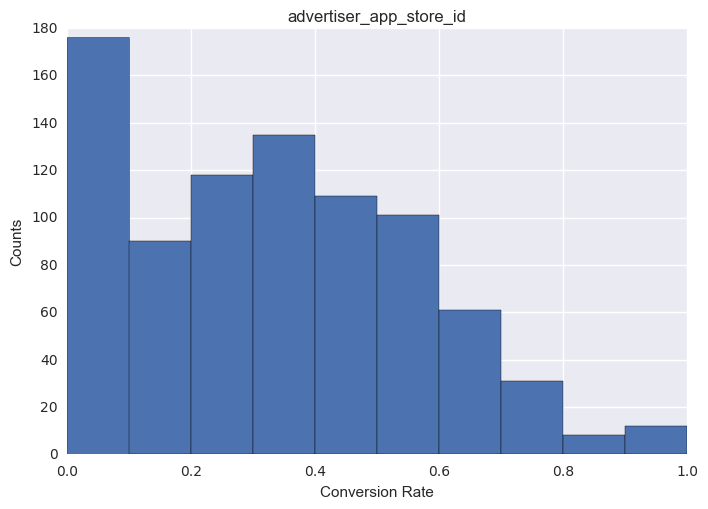

In [87]:
plt.hist(counts_ad['conversion'])
plt.xlabel('Conversion Rate')
plt.ylabel('Counts')
plt.title('advertiser_app_store_id')

### country_code

In [40]:
ins = pd.DataFrame(data_install.groupby('country_code')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('country_code')['is_install'].count().rename('total_counts')).reset_index()
counts_country = total.merge(ins, how = 'left', on = 'country_code').fillna(0.0)
counts_country['conversion'] = counts_country['install_counts']/counts_country['total_counts']

In [41]:
counts_country.sort_values('conversion', ascending = False)

,country_code,total_counts,install_counts,conversion
82,GW,1,1.0,1.000000
181,SM,1,1.0,1.000000
172,SB,1,1.0,1.000000
197,TO,1,1.0,1.000000
195,TM,1,1.0,1.000000
190,TD,1,1.0,1.000000
144,NF,1,1.0,1.000000
121,MC,5,4.0,0.800000
9,AS,4,3.0,0.750000
51,DJ,4,3.0,0.750000


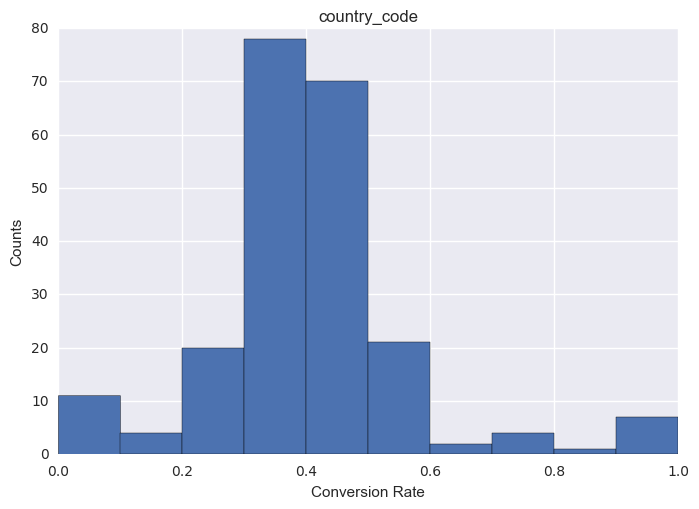

In [95]:
plt.hist(counts_country['conversion'])
plt.xlabel('Conversion Rate')
plt.ylabel('Counts')
plt.title('country_code')

### campaign_id <- useless

In [42]:
ins = pd.DataFrame(data_install.groupby('campaign_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('campaign_id')['is_install'].count().rename('total_counts')).reset_index()
counts_campaign_id = total.merge(ins, how = 'left', on = 'campaign_id').fillna(0.0)
counts_campaign_id['conversion'] = counts_campaign_id['install_counts']/counts_campaign_id['total_counts']

In [43]:
counts_campaign_id.sort_values('conversion', ascending = False)

,campaign_id,total_counts,install_counts,conversion
0,51328f29a80c3f2b340000f6,1,1.0,1.0
2197,580a7615d7cfd36123000088,2,2.0,1.0
3260,584673b8eaaaa0e56900007f,7,7.0,1.0
3261,584674870c880c2c2200006c,1,1.0,1.0
3278,5847a2752d9cadbb64000264,1,1.0,1.0
3279,5847a38af07532a164000213,1,1.0,1.0
2217,580ed46656586cfa27000026,1,1.0,1.0
837,574861a1839628243f000050,2,2.0,1.0
3298,584840996dea79c1750000e6,2,2.0,1.0
2198,580a78f62b58a33c23000090,1,1.0,1.0


### creative_id  <- useless

In [44]:
ins = pd.DataFrame(data_install.groupby('creative_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('creative_id')['is_install'].count().rename('total_counts')).reset_index()
counts_creative_id = total.merge(ins, how = 'left', on = 'creative_id').fillna(0.0)
counts_creative_id['conversion'] = counts_creative_id['install_counts']/counts_creative_id['total_counts']
counts_creative_id.sort_values('conversion', ascending = False)

,creative_id,total_counts,install_counts,conversion
3498,57edc530bb47ff4937000022,2,2.0,1.0
7682,585a3baed39d867f22000213,1,1.0,1.0
882,56d93a4a61c7bd786d000074,2,2.0,1.0
2285,57aa4bbb316ce33d770000a5,1,1.0,1.0
7676,585a3153b5ed234c1e0000fa,4,4.0,1.0
5356,582efa5a11921cf666000047,3,3.0,1.0
2293,57ab8ca7ce5bb2a13100000e,1,1.0,1.0
5352,582ef6e09eaec31f24000023,4,4.0,1.0
7685,585a492dadcce973220002f0,2,2.0,1.0
2278,57aa401c6926b5cd33000077,1,1.0,1.0


### device_language

In [51]:
data['device_language'] = data['device_language'].apply(lambda x: str(x).lower().split('-')[0])
data_install['device_language'] = data_install['device_language'].apply(lambda x: str(x).lower().split('-')[0])

/Users/amiee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
ins = pd.DataFrame(data_install.groupby('device_language')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_language')['is_install'].count().rename('total_counts')).reset_index()
counts_language = total.merge(ins, how = 'left', on = 'device_language').fillna(0.0)
counts_language['conversion'] = counts_language['install_counts']/counts_language['total_counts']
counts_language.sort_values('conversion', ascending = False)

,device_language,total_counts,install_counts,conversion
26,gl,2,2.0,1.000000
25,gd,1,1.0,1.000000
77,te,5,5.0,1.000000
71,so,3,3.0,1.000000
70,sm,1,1.0,1.000000
42,kn,1,1.0,1.000000
1,am,1,1.0,1.000000
49,ml,5,5.0,1.000000
57,nn,1,1.0,1.000000
51,mr,10,7.0,0.700000


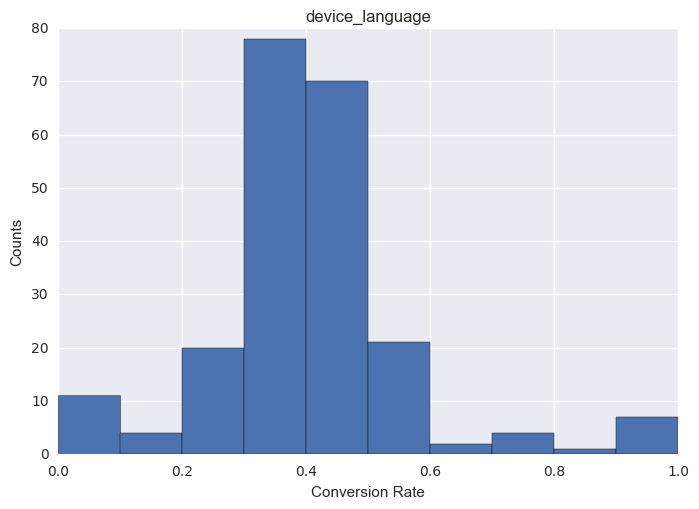

In [96]:
plt.hist(counts_country['conversion'])
plt.xlabel('Conversion Rate')
plt.ylabel('Counts')
plt.title('device_language')

### device_make <- useless

In [53]:
ins = pd.DataFrame(data_install.groupby('device_make')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_make')['is_install'].count().rename('total_counts')).reset_index()
counts_device_make = total.merge(ins, how = 'left', on = 'device_make').fillna(0.0)
counts_device_make['conversion'] = counts_device_make['install_counts']/counts_device_make['total_counts']
counts_device_make.sort_values('conversion', ascending = False)

,device_make,total_counts,install_counts,conversion
0,1005TG,1,1.0,1.0
1597,Okapia,1,1.0,1.0
1133,KOUZIRO Co.,1,1.0,1.0
1138,KT TECH,3,3.0,1.0
1141,KUBO,1,1.0,1.0
1142,KULT,1,1.0,1.0
1144,KYOWON,2,2.0,1.0
1145,KYT,2,2.0,1.0
1146,KZEN,2,2.0,1.0
1153,Keian,1,1.0,1.0


### device_model <- useless

In [59]:
ins = pd.DataFrame(data_install.groupby('device_model')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_model')['is_install'].count().rename('total_counts')).reset_index()
counts_device_model = total.merge(ins, how = 'left', on = 'device_model').fillna(0.0)
counts_device_model['conversion'] = counts_device_model['install_counts']/counts_device_model['total_counts']
counts_device_model.sort_values('conversion', ascending = False)

,device_model,total_counts,install_counts,conversion
2367,Allure Ultra,1,1.0,1.0
10762,N5D,1,1.0,1.0
10803,N9006,1,1.0,1.0
10800,N9000,1,1.0,1.0
10798,N9,1,1.0,1.0
10796,N8800,2,2.0,1.0
10795,N861,1,1.0,1.0
10787,N788_BASHA,1,1.0,1.0
2930,AvenzoTAB9,1,1.0,1.0
10785,N76VJ,1,1.0,1.0


### device_platform

In [60]:
ins = pd.DataFrame(data_install.groupby('device_platform')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_platform')['is_install'].count().rename('total_counts')).reset_index()
counts_device_platform = total.merge(ins, how = 'left', on = 'device_platform').fillna(0.0)
counts_device_platform['conversion'] = counts_device_platform['install_counts']/counts_device_platform['total_counts']
counts_device_platform.sort_values('conversion', ascending = False)

,device_platform,total_counts,install_counts,conversion
1,iOS,290427,157941,0.543823
2,windows,11785,5545,0.470513
0,android,397788,186514,0.468878


(0, 0.6)

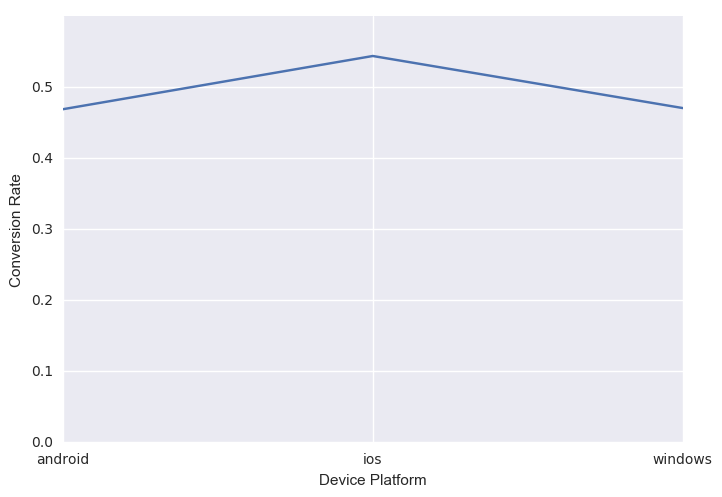

In [106]:
plt.plot(counts_device_platform['conversion'])
plt.xticks(range(3), ['android', 'ios', 'windows'])
plt.xlabel('Device Platform')
plt.ylabel('Conversion Rate')
plt.ylim(0,0.6)

### device_connection <- useless

In [61]:
ins = pd.DataFrame(data_install.groupby('device_connection')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_connection')['is_install'].count().rename('total_counts')).reset_index()
counts_device_connection = total.merge(ins, how = 'left', on = 'device_connection').fillna(0.0)
counts_device_connection['conversion'] = counts_device_connection['install_counts']/counts_device_connection['total_counts']
counts_device_connection.sort_values('conversion', ascending = False)

,device_connection,total_counts,install_counts,conversion
1,wifi,510226,252602,0.495079
0,mobile,137870,67821,0.491920


(0.4, 0.5)

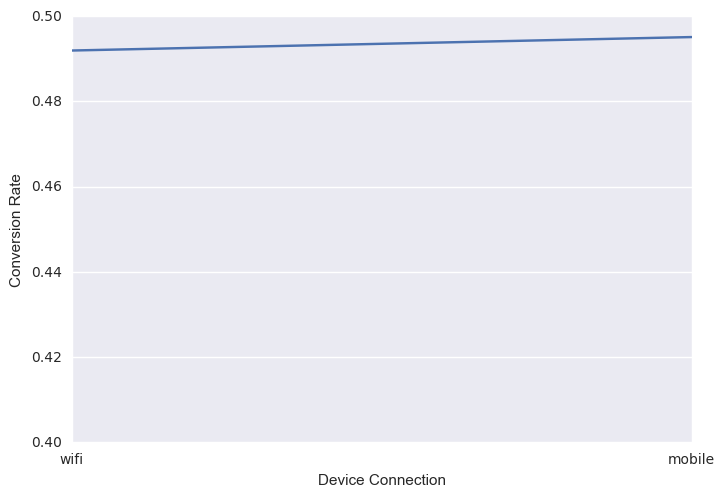

In [110]:
plt.plot(counts_device_connection['conversion'])
plt.xticks(range(2), ['wifi', 'mobile'])
plt.xlabel('Device Connection')
plt.ylabel('Conversion Rate')
plt.ylim(0.4,0.5)

### n_campaign_views

In [68]:
ins = pd.DataFrame(data_install.groupby('n_campaign_views')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('n_campaign_views')['is_install'].count().rename('total_counts')).reset_index()
counts_views = total.merge(ins, how = 'left', on = 'n_campaign_views').fillna(0.0)
counts_views['conversion'] = counts_views['install_counts']/counts_views['total_counts']
counts_views.sort_values('conversion', ascending = False)

,n_campaign_views,total_counts,install_counts,conversion
212,214,1,1.0,1.000000
308,425,1,1.0,1.000000
0,0,420645,240391.0,0.571482
254,276,2,1.0,0.500000
1,1,119687,57670.0,0.481840
2,2,49025,20768.0,0.423621
3,3,31889,11779.0,0.369375
4,4,22184,7480.0,0.337180
5,5,11182,3323.0,0.297174
6,6,8718,2425.0,0.278160


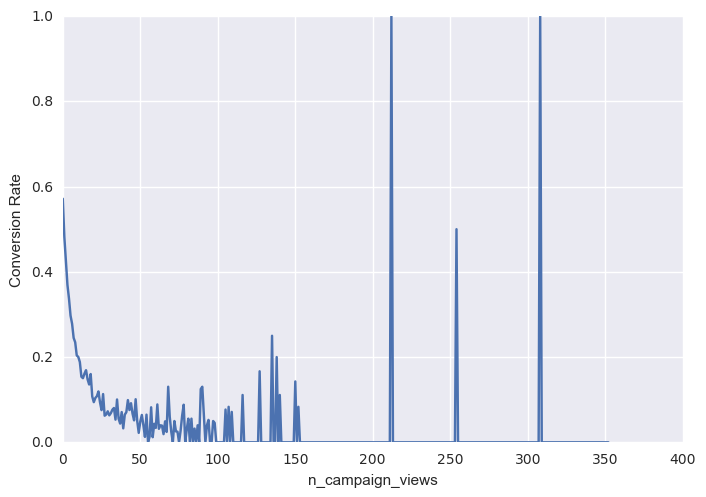

In [118]:
plt.plot(range(counts_views.shape[0]), counts_views['conversion'])
plt.xlabel('n_campaign_views')
plt.ylabel('Conversion Rate')

### time zone

In [124]:
data['time_zone']

0               Asia/Shanghai
1               Asia/Makassar
2             America/Toronto
3                Asia/Bangkok
4               Europe/Prague
5               Asia/Shanghai
6           America/Sao_Paulo
7            America/New_York
8            America/New_York
9             America/Detroit
10           America/Mazatlan
11           America/New_York
12            America/Halifax
13              Europe/Berlin
14             Asia/Jerusalem
15           America/New_York
16           America/New_York
17           America/New_York
18              Asia/Shanghai
19               Asia/Kolkata
20           Europe/Bucharest
21                 Asia/Tokyo
22          America/Sao_Paulo
23            America/Chicago
24               Europe/Paris
25          America/Guayaquil
26        America/Los_Angeles
27           America/New_York
28              Europe/London
29           America/New_York
                 ...         
699970        America/Chicago
699971          Europe/London
699972    

In [132]:
def get_continent(x):
    if len(str(x).split('/')) > 1:
        return str(x).split('/')[0]
    else:
        return None
    
def get_city(x):
    if len(str(x).split('/')) > 1:
        return str(x).split('/')[1]
    else:
        return str(x).split('/')[0]

In [134]:
data['time_zone_continent'] = data['time_zone'].apply(lambda x: get_continent(x))
data_install['time_zone_continent'] = data_install['time_zone'].apply(lambda x: get_continent(x))

/Users/amiee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/amiee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [166]:
data[data['time_zone_continent'] == 'Indian'] = 'Asia'
data_install[data_install['time_zone_continent'] == 'Indian']['time_zone_continent'] = 'Asia'

/Users/amiee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [167]:
ins = pd.DataFrame(data_install.groupby('time_zone_continent')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('time_zone_continent')['is_install'].count().rename('total_counts')).reset_index()
counts_continent = total.merge(ins, how = 'left', on = 'time_zone_continent').fillna(0.0)
counts_continent['conversion'] = counts_continent['install_counts']/counts_continent['total_counts']
counts_continent.sort_values('conversion', ascending = False)

,time_zone_continent,total_counts,install_counts,conversion
6,Australia,10555,6019.0,0.570251
1,America,310177,172348.0,0.555644
9,Pacific,4305,2094.0,0.486411
4,Asia,170996,79501.0,0.464929
8,Europe,190126,84159.0,0.442649
5,Atlantic,1471,629.0,0.427600
0,Africa,8488,3539.0,0.416942
7,Etc,3557,1481.0,0.416362
2,Antarctica,108,43.0,0.398148
3,Arctic,1,0.0,0.000000


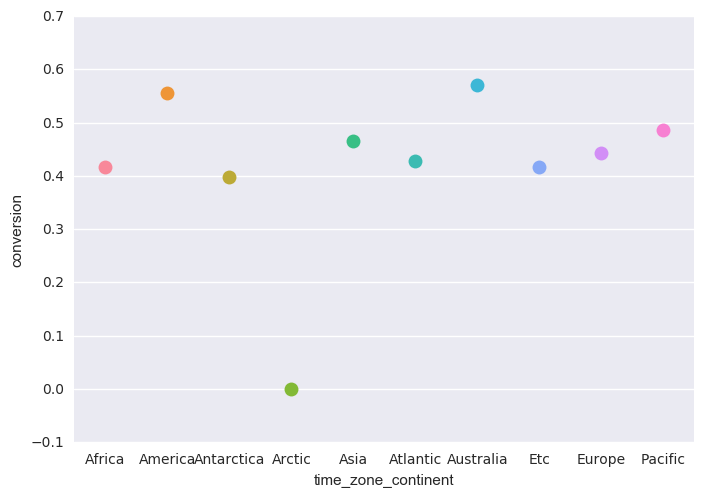

In [168]:
sns.stripplot(x="time_zone_continent", y="conversion", data=counts_continent,size=10)